<a href="https://colab.research.google.com/github/limruby/sentiment_analysis/blob/main/Sentiment_Analysis_SI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Import Library**








*   Pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.
*   NLTK is a leading platform for building Python programs to work with human language data.






In [ ]:
# Import Library
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
from textblob import TextBlob
from wordcloud import WordCloud
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# **2. Import Data**

In [ ]:
# Import data from Github
url = 'https://raw.githubusercontent.com/limruby/sentiment_analysis/branch-3/data_masknew.csv'
df = pd.read_csv(url, sep=',', encoding = "ISO-8859-1")

In [ ]:
df.head(5)

,created_time,message
0,15/01/2021 06:14,I have know more words for this guy...
1,15/01/2021 05:42,Fuck him I will not wear on. Half the people I...
2,15/01/2021 05:27,JUST THE START OF DICTATORSHIP BE READY AMERIC...
3,15/01/2021 01:41,Once again he can kiss my ass
4,14/01/2021 23:44,I live in a state where masks are mandated and...


In [ ]:
df.shape

(322, 2)

# **3. PreProcessing**


###2. Clean Text

In [ ]:
# Remove Duplicate from selected column
df['message'] = df['message'].str.replace('http\S+|www.\S+', '', case=False)
# Remove Username
df['message'] = df['message'].str.replace('@[^\s]+','', case=False)
# Remove @mentions
df['message'] = df['message'].str.replace('@[A-Za-z0–9]+', '', case=False)
# Remove #hashtag
df['message'] = df['message'].str.replace('#', '', case=False)

df.message

0                 I have know more words for this guy...
1      Fuck him I will not wear on. Half the people I...
2      JUST THE START OF DICTATORSHIP BE READY AMERIC...
3                          Once again he can kiss my ass
4      I live in a state where masks are mandated and...
                             ...                        
317    He's nuts.How about that..He's got a lot more ...
318           Easy for him.  He probably sleeps with it.
319                                ????????????????biden
320                                ????????????????biden
321                        What do you think about this?
Name: message, Length: 322, dtype: object

###3. LowerCasing


In [ ]:
# Change the message column into lowercase
df['message'] = df['message'].str.lower()
df.message

0                 i have know more words for this guy...
1      fuck him i will not wear on. half the people i...
2      just the start of dictatorship be ready americ...
3                          once again he can kiss my ass
4      i live in a state where masks are mandated and...
                             ...                        
317    he's nuts.how about that..he's got a lot more ...
318           easy for him.  he probably sleeps with it.
319                                ????????????????biden
320                                ????????????????biden
321                        what do you think about this?
Name: message, Length: 322, dtype: object

# **4. Sentiment Analysis**

###Get Subjectivity & polarity

In [ ]:
# Change title to string
df['message'] = df['message'].astype(str)

In [ ]:
# Import library for Text Analytics
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
# Sentiment Analysis Using Vader Lexicon
sid = SentimentIntensityAnalyzer()
listy = [] 
for index, row in df.iterrows():
  df['message']
  ss = sid.polarity_scores(row['message'])
  listy.append(ss)
  
se = pd.Series(listy)
df['polarity'] = se.values
display(df.head(10))

,created_time,message,polarity
0,15/01/2021 06:14,i have know more words for this guy...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,15/01/2021 05:42,fuck him i will not wear on. half the people i...,"{'neg': 0.196, 'neu': 0.804, 'pos': 0.0, 'comp..."
2,15/01/2021 05:27,just the start of dictatorship be ready americ...,"{'neg': 0.176, 'neu': 0.682, 'pos': 0.142, 'co..."
3,15/01/2021 01:41,once again he can kiss my ass,"{'neg': 0.31, 'neu': 0.442, 'pos': 0.248, 'com..."
4,14/01/2021 23:44,i live in a state where masks are mandated and...,"{'neg': 0.221, 'neu': 0.728, 'pos': 0.051, 'co..."
5,14/01/2021 22:42,if they can make national mandates about this ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
6,14/01/2021 20:33,mask deez nutz!,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
7,13/01/2021 21:32,"yes folks! this is the person, that the media...","{'neg': 0.064, 'neu': 0.899, 'pos': 0.037, 'co..."
8,13/01/2021 21:17,he better consult the real leaders of the new ...,"{'neg': 0.0, 'neu': 0.838, 'pos': 0.162, 'comp..."
9,13/01/2021 20:50,good luck,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound..."


In [ ]:
# Create a function to get subjectivity
def getSubjectivity(message):
  return TextBlob(message).sentiment.subjectivity

# Create a function to get polarity
def getPolarity(message):
  return TextBlob(message).sentiment.polarity

# Create two new columns
df['Subjectivity'] = df ['message'].apply(getSubjectivity)
df['Polarity'] = df['message'].apply(getPolarity)

# Display data
df

,created_time,message,polarity,Subjectivity,Polarity
0,15/01/2021 06:14,i have know more words for this guy...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.500000,0.500000
1,15/01/2021 05:42,fuck him i will not wear on. half the people i...,"{'neg': 0.196, 'neu': 0.804, 'pos': 0.0, 'comp...",0.666667,-0.466667
2,15/01/2021 05:27,just the start of dictatorship be ready americ...,"{'neg': 0.176, 'neu': 0.682, 'pos': 0.142, 'co...",0.550000,-0.100000
3,15/01/2021 01:41,once again he can kiss my ass,"{'neg': 0.31, 'neu': 0.442, 'pos': 0.248, 'com...",0.000000,0.000000
4,14/01/2021 23:44,i live in a state where masks are mandated and...,"{'neg': 0.221, 'neu': 0.728, 'pos': 0.051, 'co...",0.590625,0.050379
...,...,...,...,...,...
317,11/01/2021 09:06,he's nuts.how about that..he's got a lot more ...,"{'neg': 0.371, 'neu': 0.629, 'pos': 0.0, 'comp...",0.500000,0.500000
318,11/01/2021 09:06,easy for him. he probably sleeps with it.,"{'neg': 0.0, 'neu': 0.707, 'pos': 0.293, 'comp...",0.833333,0.433333
319,11/01/2021 09:06,????????????????biden,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000000,0.000000
320,11/01/2021 09:06,????????????????biden,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000000,0.000000


In [ ]:
# Function to compute the negative, neutral and positive analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)

# Display data
df

,created_time,message,polarity,Subjectivity,Polarity,Analysis
0,15/01/2021 06:14,i have know more words for this guy...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.500000,0.500000,Positive
1,15/01/2021 05:42,fuck him i will not wear on. half the people i...,"{'neg': 0.196, 'neu': 0.804, 'pos': 0.0, 'comp...",0.666667,-0.466667,Negative
2,15/01/2021 05:27,just the start of dictatorship be ready americ...,"{'neg': 0.176, 'neu': 0.682, 'pos': 0.142, 'co...",0.550000,-0.100000,Negative
3,15/01/2021 01:41,once again he can kiss my ass,"{'neg': 0.31, 'neu': 0.442, 'pos': 0.248, 'com...",0.000000,0.000000,Neutral
4,14/01/2021 23:44,i live in a state where masks are mandated and...,"{'neg': 0.221, 'neu': 0.728, 'pos': 0.051, 'co...",0.590625,0.050379,Positive
...,...,...,...,...,...,...
317,11/01/2021 09:06,he's nuts.how about that..he's got a lot more ...,"{'neg': 0.371, 'neu': 0.629, 'pos': 0.0, 'comp...",0.500000,0.500000,Positive
318,11/01/2021 09:06,easy for him. he probably sleeps with it.,"{'neg': 0.0, 'neu': 0.707, 'pos': 0.293, 'comp...",0.833333,0.433333,Positive
319,11/01/2021 09:06,????????????????biden,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000000,0.000000,Neutral
320,11/01/2021 09:06,????????????????biden,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000000,0.000000,Neutral


### Print Positive Comments


In [ ]:
# Print all positive comments
j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') ' + sortedDF['message'][i])
    print()
    j= j+1

1) i have know more words for this guy...

2) i live in a state where masks are mandated and its a fight every day to get customers to wear their masks when they come in the basic human instinct is to make our own decisions ppl can be told to do something but its up to them to actually do it i personally am over the lies and the bullshit welcome to 4 years of ridiculous crap

3) he better consult the real leaders of the new word order his bosses and the people that now controll and bought our country silicon valley. good job america only in name now.idiots.

4) good luck

5) dont forget to pok a hole in the mouth area when designing a new mask to insert a straw so food can suck in... restaurant will have new menu called protein meat smoothies

6) good luck in enforcing it. we still r america. freedom of choice.

7) absolutely this bs is the communist party playbook

8) good!

9) make dont work if he wants wear one more power to him

10) it is about control. see how fast they can tell 

### Print Negative Comments


In [ ]:
# Print all negative comments
j=1
sortedDF = df.sort_values(by=['Polarity'], ascending='False')
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ')'+sortedDF['message'][i])
    print()
    j=j+1

1)fuck him i will not wear on. half the people i see wearing them are wearing wrong so to the stupid people out there wearing masks you do know that your nose has it be in the mask for it to work if you believe it does

2)just the start of dictatorship be ready america the worse is yet to come.

3)fuck him

4)fuck you joe 

5)fuck biden

6)eat shit you disgusting cheating lying baboon 

7)f this blithering idiot!!

8)i decide when and where i wear a mask. i don't need an empty headed clown telling me what to do. freedom of choice. 

9)umm your a fucking idiot

10)i think a white male  is fucked

11)not in your power, idiot.

12)fuck you dumb ass biden

13)if they've been wearing them in the states that have covid the worst then why is covid still so bad thete 3

14)i see he got his second shot today sad. 4 the rest of the u.s.

15)fuck you biden

16)your  defunded the police  how you going to  enforce  that when you chouldnt  stop  a few peaceful  protesters  from taking over the  capi

### Visualization

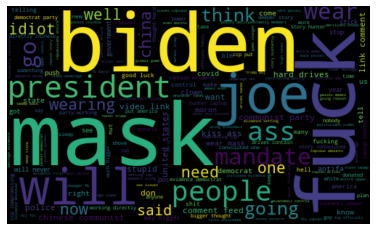

In [ ]:
# plot Word Cloud
allWords = ' '.join( [message for message in df['message']])
wordCloud = WordCloud(width = 500, height=300, random_state = 21, max_font_size=119).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

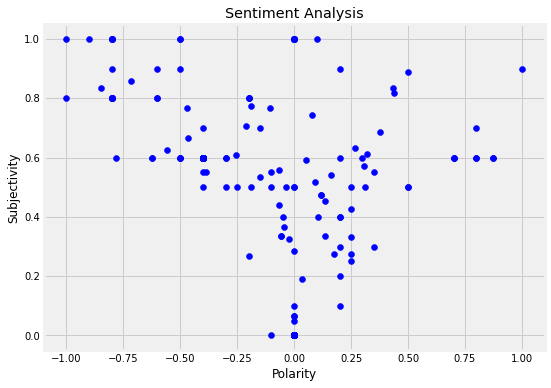

In [ ]:
# Plot the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

<function matplotlib.pyplot.show>

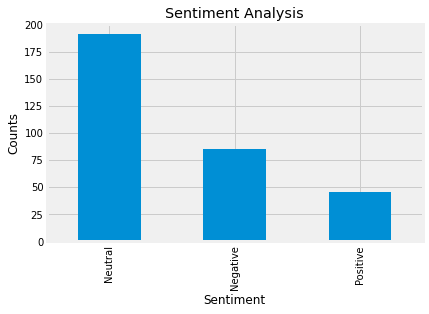

In [ ]:
# Show value counts

df['Analysis'].value_counts()

# Plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show

### Save to CSV

In [ ]:
df.to_csv('Output_File.csv', index=False)